In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Zac\BME574`


In [2]:
Pkg.add(["Plots","Optim","ForwardDiff"])

   Resolving package versions...
  No Changes to `C:\Users\Zac\BME574\Project.toml`
  No Changes to `C:\Users\Zac\BME574\Manifest.toml`


In [3]:
using Plots, Optim, ForwardDiff

In [4]:
h = 0.5
xs = collect(-6:h:6)
ys = collect(-6:h:6)
X = [x for x = xs for _ = ys]
Y = [y for _ = xs for y = ys]

625-element Vector{Float64}:
 -6.0
 -5.5
 -5.0
 -4.5
 -4.0
 -3.5
 -3.0
 -2.5
 -2.0
 -1.5
 -1.0
 -0.5
  0.0
  ⋮
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0

In [5]:
f0(x,y) = 1.5 - 1.0*exp(-0.03*(3*x^2+y^2))
Z = ((x,y) -> begin
        f0(x,y)
    end)

#7 (generic function with 1 method)

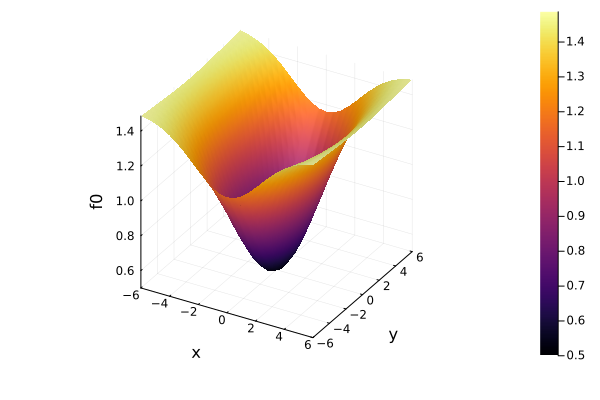

In [6]:
surface(X, Y, Z.(X,Y), xlabel = "x", ylabel = "y", zlabel = "f0")

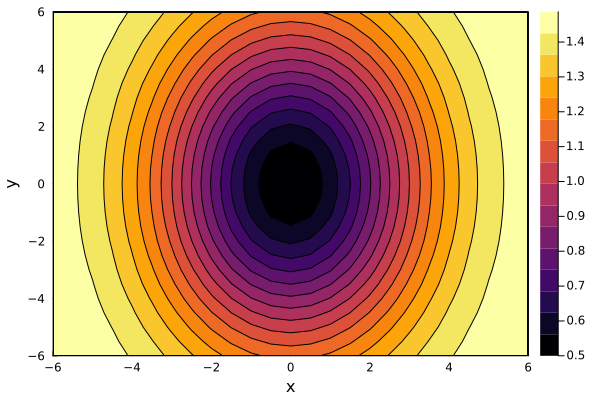

In [7]:
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")

In [8]:
f(x,y) = 1.5-1.6*exp(-0.05*(3*(x+3).^2+(y+3).^2))
fs(x,y) = f(x,y) + (0.5-exp(-0.1*(3*(x-3).^2+(y-3).^2)))

fs (generic function with 1 method)

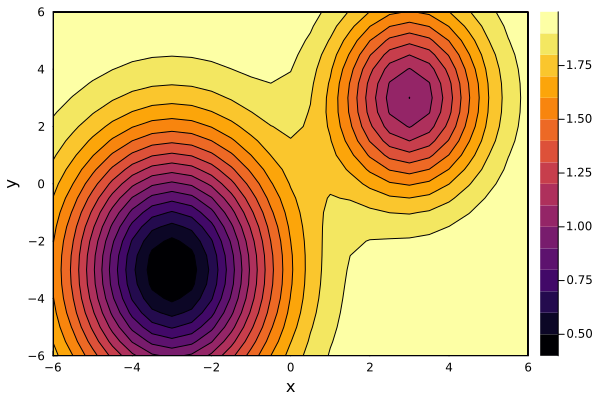

In [9]:
contourf(xs, ys, fs, xlabel = "x", ylabel = "y", zlabel = "f0",aspect=:equal)

In [10]:
# Gradient Decent
fquad(x,y) = x^2 + 3*y^2#this is just the function

fquad (generic function with 1 method)

In [11]:
# current values
xc = [3.0]
yc = [2.0]
fc = [fquad(3.0,2.0)]
for j in 1:10
    del = (xc[end]^2 + 9*yc[end]^2)/(2*xc[end] + 54*yc[end]^2)#step size, but I'm not sure where the terms come from

    #find the gradient direction and step downward
    push!(xc,(1-2*del)*xc[end]) # (1-δf/δx)*current positon. Add to xc list end
    push!(yc,(1-6*del)*yc[end]) # (1-δf/δy)*current positon. Add to yc list end
    push!(fc,fquad(xc[end],yc[end]))#evaluate new point and add to end of list

    if abs(fc[end]-fc[end-1])<1e-6
        break
    end
end

In [12]:
collect(zip(xc, yc))

11-element Vector{Tuple{Float64, Float64}}:
 (3.0, 2.0)
 (1.7837837837837835, -0.43243243243243246)
 (0.5137388832064905, 0.4912365861692354)
 (0.33571884365332627, -0.01943114421935184)
 (0.2230353037547772, 0.0001349613744421102)
 (0.1732905027900615, 4.4657822539913496e-5)
 (0.14326089581505838, 2.144148631303372e-5)
 (0.12273720918597388, 1.2226305643245116e-5)
 (0.10767278581724037, 7.7244374893187e-6)
 (0.09607935664805428, 5.2293023010393166e-6)
 (0.08684811369897824, 3.7220182700309583e-6)

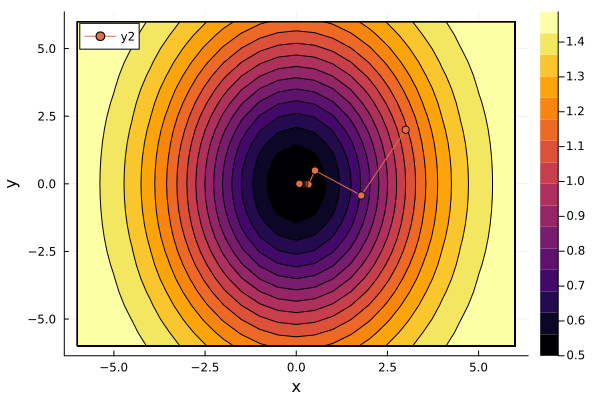

In [13]:
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(xc, yc, markershape = :circle, aspect=:equal)

In [14]:
fquad2(x) = x[1]^2 + 3*x[2]^2#this is just the function
xc2 = [3.0]
yc2 = [2.0]
x02 = [xc2[1], yc2[1]]

fc2 = [fquad2(x02)]

function addpointCallback!(x)
        #find the gradient direction and step downward
   # push!(xc2,x[1]) # (1-δf/δx)*current positon. Add to xc list end
   # push!(yc2,x[2]) # (1-δf/δy)*current positon. Add to yc list end
   # push!(fc2,fquad(x[1],x[2]))#evaluate new point and add to end of list
    #println()
    #println("TEST       ",x.iteration)
    #println(x)
    #println("Value      ",x.value)
    #println("g_norm     ",x.g_norm)
    #println("metadata   ",x.metadata)
    #println(x02)
    #println(x.metadata["x"])
    #println(x.metadata["x"][1])
    push!(xc2,x.metadata["x"][1]) # (1-δf/δx)*current positon. Add to xc list end
    push!(yc2,x.metadata["x"][2]) # (1-δf/δy)*current positon. Add to yc list end
    push!(fc2,x.value)#evaluate new point and add to end of list
    #println()
    return false
end
#could also just use store_trace = true
res = optimize(fquad2,x02,GradientDescent(), autodiff = :forward, Optim.Options(extended_trace = true, callback = addpointCallback!))

 * Status: success

 * Candidate solution
    Final objective value:     2.813093e-18

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.01e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.25e+00 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.32e-17 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.69e+00 ≰ 0.0e+00
    |g(x)|                 = 3.22e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    25
    f(x) calls:    63
    ∇f(x) calls:   63


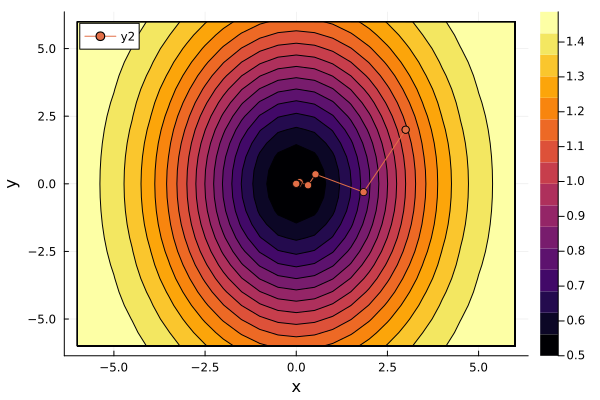

In [15]:
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(xc2, yc2, markershape = :circle, aspect=:equal)